# TPC PID Performance

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 16

from readdata import get_data
from tpcplot import draw_g4xyz
from tracklen import process_track, plot_dedx
from recoclusters import digits_to_clusters, pixid2position

In [2]:
data_path = 'tracks'

In [3]:
import glob

In [7]:
def get_keys(files):
    return [os.path.splitext(os.path.split(item)[-1])[0] for item in files]

In [62]:
files = sorted(glob.glob(f'{data_path}/*.npy'))
keys = get_keys(files)
data = {key: fname for key, fname in zip(keys, files)}
', '.join(data.keys())

'K_100.0, K_150.0, K_1500.0, K_200.0, K_250.0, K_300.0, K_400.0, K_500.0, K_600.0, e_100.0, e_150.0, e_1500.0, e_200.0, e_250.0, e_300.0, e_400.0, e_500.0, e_600.0, mu_100.0, mu_150.0, mu_1500.0, mu_200.0, mu_250.0, mu_300.0, mu_400.0, mu_500.0, mu_600.0, p_1500.0, p_250.0, p_300.0, p_400.0, p_500.0, p_600.0, pi_100.0, pi_150.0, pi_1500.0, pi_200.0, pi_250.0, pi_300.0, pi_400.0, pi_500.0, pi_600.0'

In [105]:
def dedx_plot(ds):
    fig, ax = plt.subplots(figsize=(14, 6), ncols=2)
    xlabels = ['Track length (mm)', 'dEdx (keV / mm)']
    for i, (a, lbl) in enumerate(zip(ax, xlabels)):
        a.hist(ds[:, i+1], bins=40, histtype='step')
        a.set_xlabel(lbl, fontsize=18)
        a.minorticks_on()
        a.grid(which='major')
        a.grid(which='minor', linestyle=':')
    fig.tight_layout()

## Muons

(9035, 3)


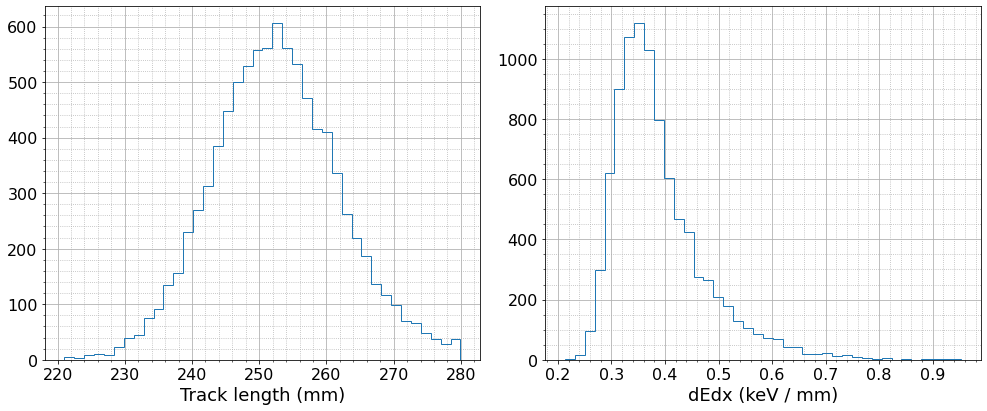

In [156]:
ds = np.load(data['mu_100.0'])
ds = ds[(ds[:, 1] < 280) & (ds[:, 1] > 220) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(9288, 3)


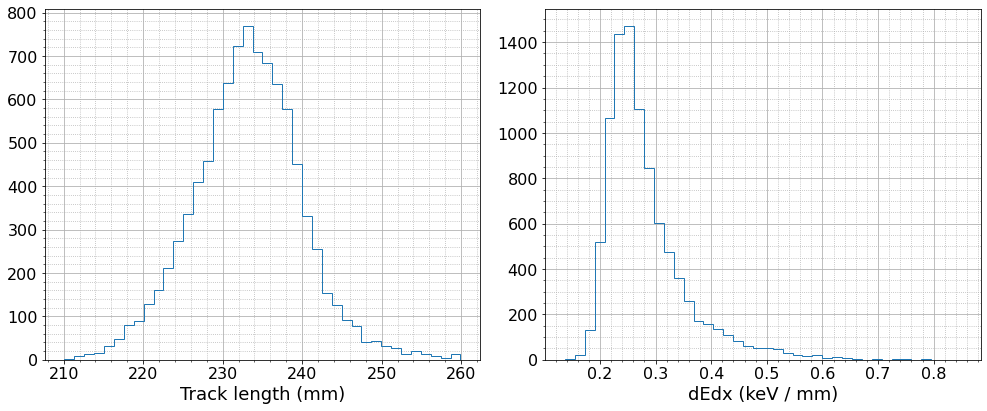

In [108]:
ds = np.load(data['mu_150.0'])
ds = ds[(ds[:, 1] < 260) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(9259, 3)


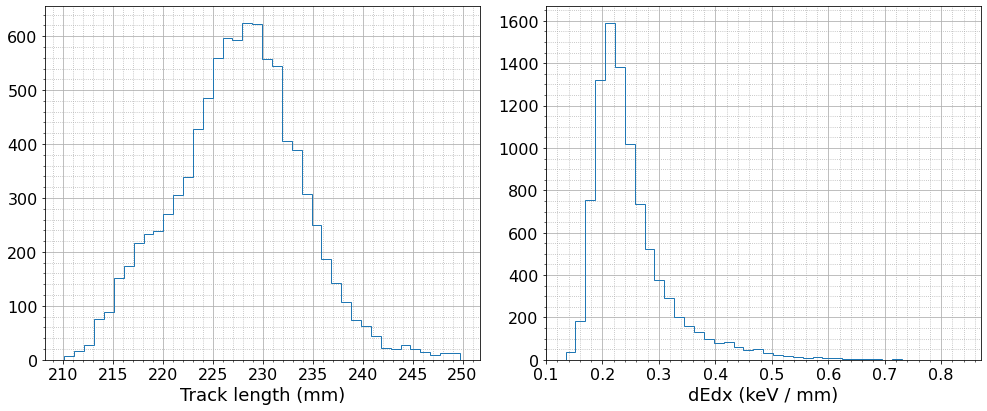

In [110]:
ds = np.load(data['mu_200.0'])
ds = ds[(ds[:, 1] < 250) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(9056, 3)


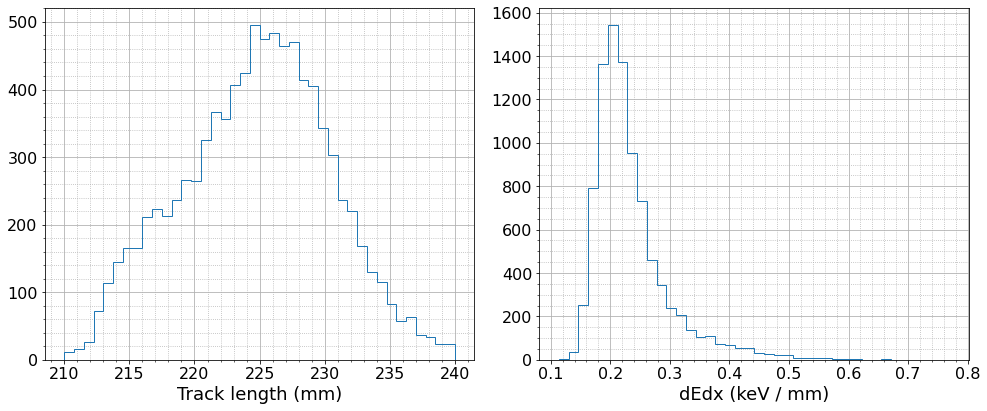

In [112]:
ds = np.load(data['mu_250.0'])
ds = ds[(ds[:, 1] < 240) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(9026, 3)


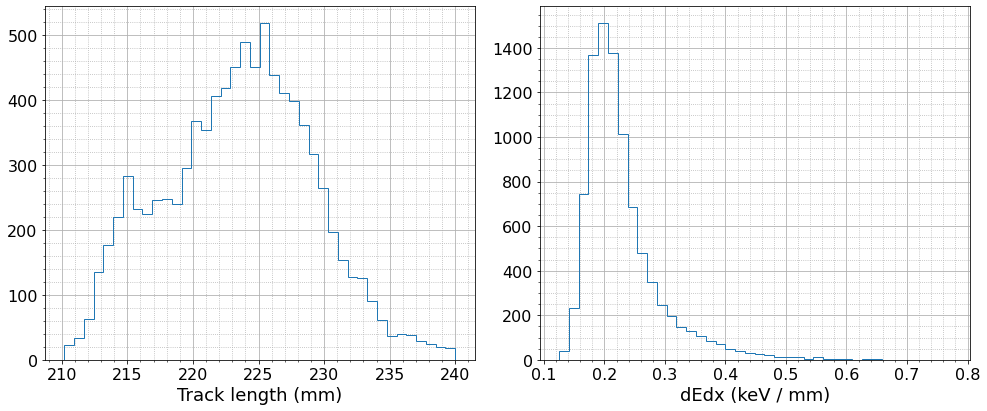

In [113]:
ds = np.load(data['mu_300.0'])
ds = ds[(ds[:, 1] < 240) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8942, 3)


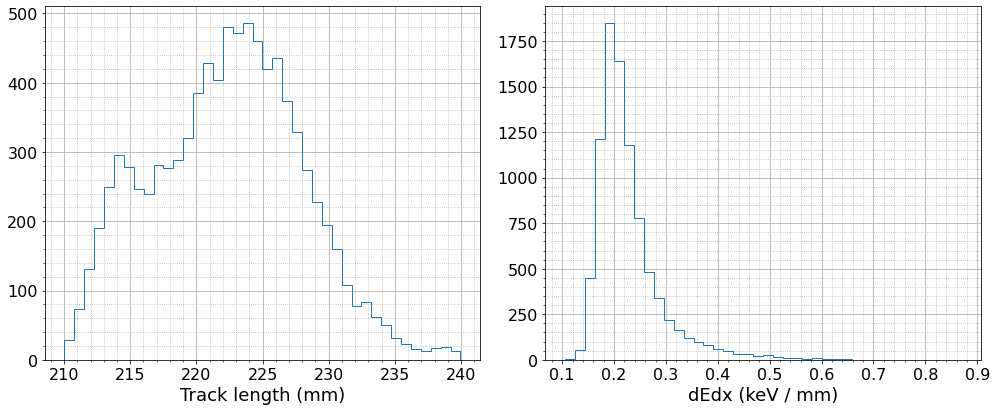

In [115]:
ds = np.load(data['mu_400.0'])
ds = ds[(ds[:, 1] < 240) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8897, 3)


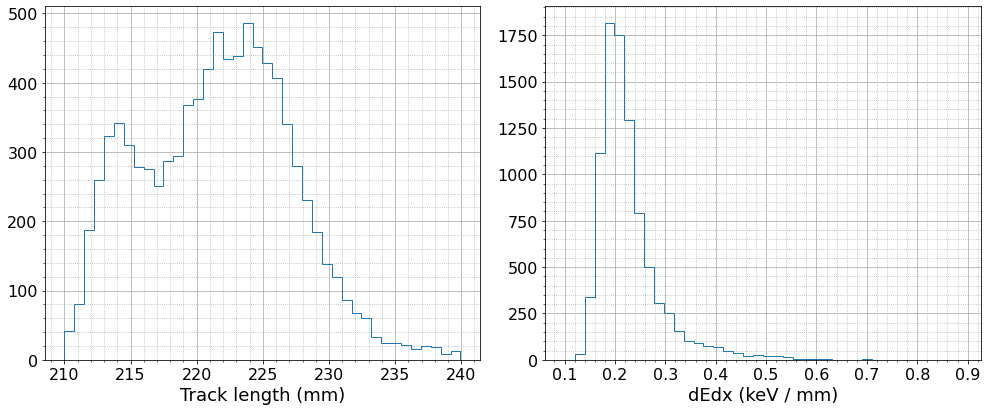

In [118]:
ds = np.load(data['mu_500.0'])
ds = ds[(ds[:, 1] < 240) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8831, 3)


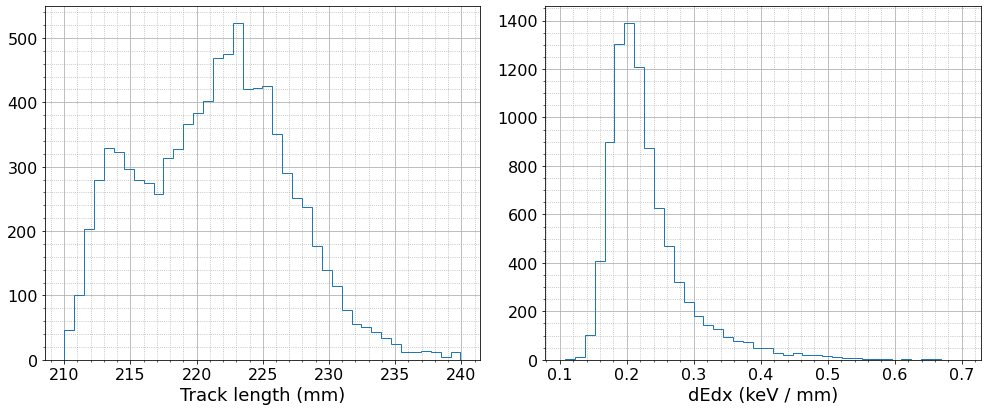

In [119]:
ds = np.load(data['mu_600.0'])
ds = ds[(ds[:, 1] < 240) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8807, 3)


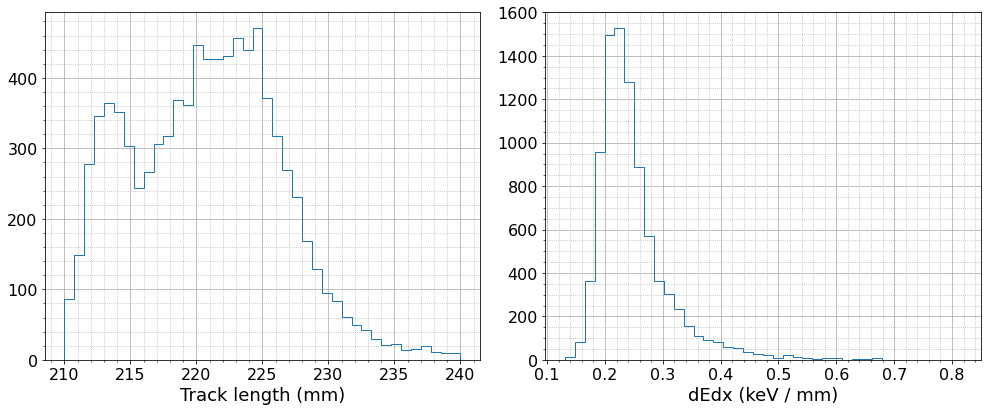

In [121]:
ds = np.load(data['mu_1500.0'])
ds = ds[(ds[:, 1] < 240) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

What are the two peaks in the track length???

In [123]:
ds0 = np.load(data['mu_1500.0'])
mask = np.where((ds0[:, 1] > 213) & (ds0[:, 1] < 214))[0]
mask[:5]

array([ 6, 19, 30, 31, 46], dtype=int64)

In [124]:
ds1 = np.load(data['mu_1500.0'])
mask1 = np.where((ds1[:, 1] > 224) & (ds1[:, 1] < 225))[0]
mask1[:5]

array([ 54, 117, 119, 126, 137], dtype=int64)

## Pions

(7717, 3)


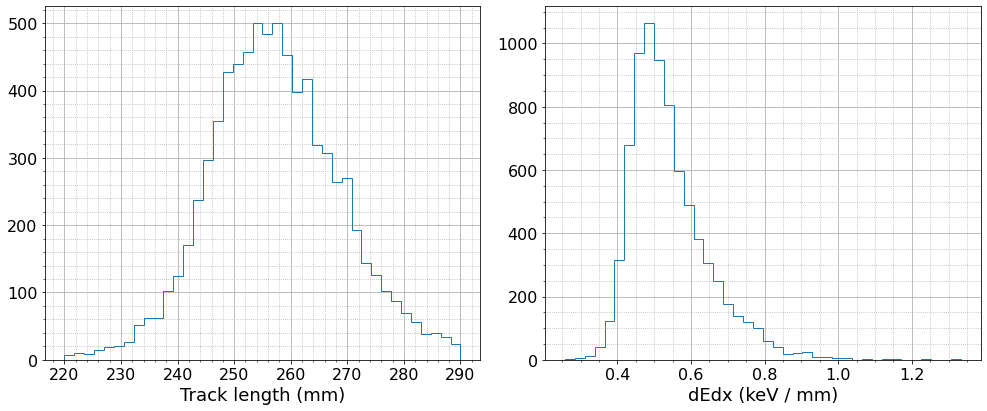

In [128]:
ds = np.load(data['pi_100.0'])
ds = ds[(ds[:, 1] < 290) & (ds[:, 1] > 220) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8629, 3)


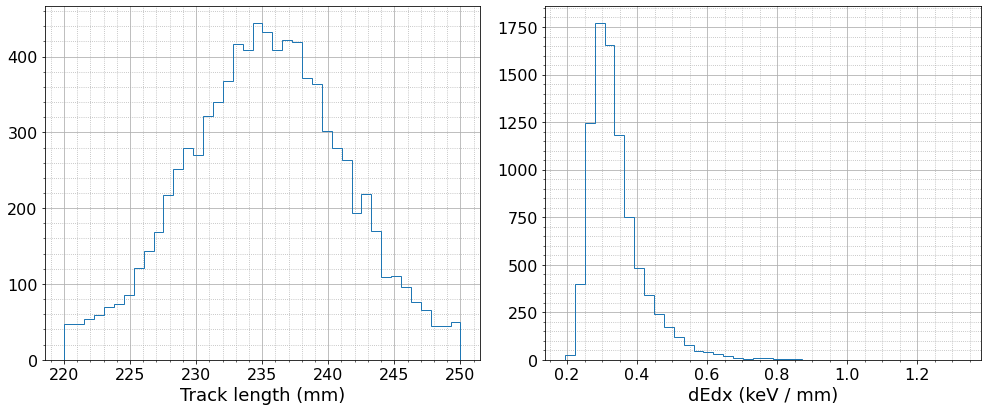

In [130]:
ds = np.load(data['pi_150.0'])
ds = ds[(ds[:, 1] < 250) & (ds[:, 1] > 220) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8845, 3)


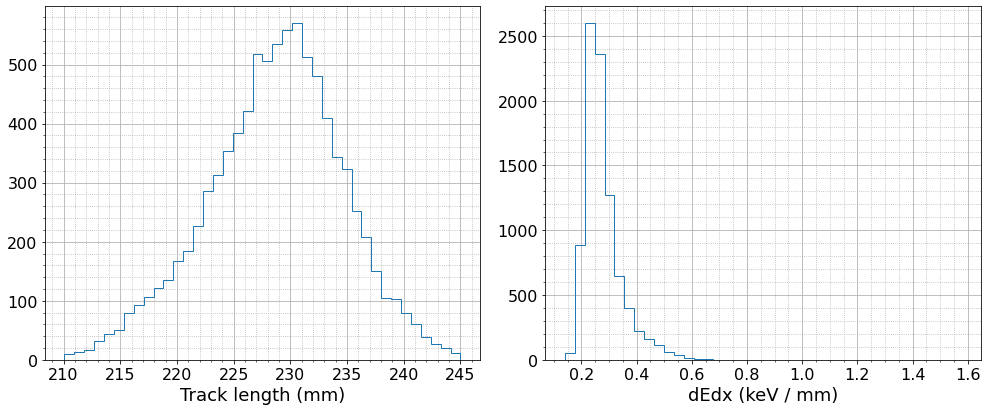

In [133]:
ds = np.load(data['pi_200.0'])
ds = ds[(ds[:, 1] < 245) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8815, 3)


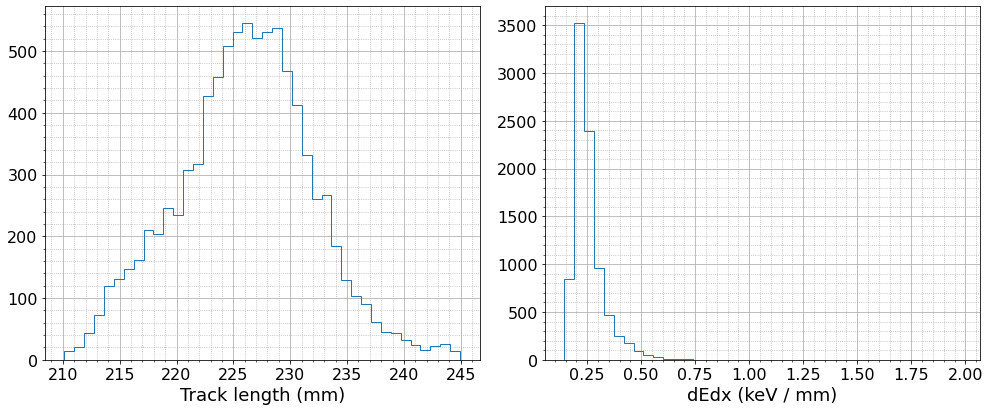

In [134]:
ds = np.load(data['pi_250.0'])
ds = ds[(ds[:, 1] < 245) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8811, 3)


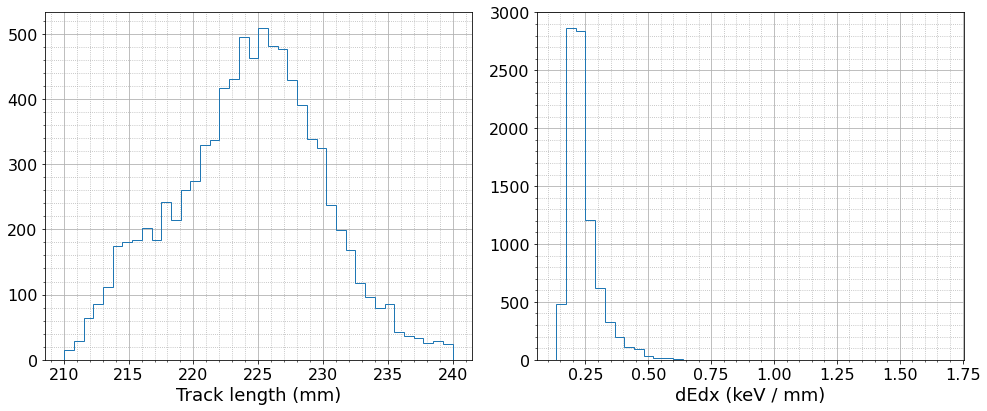

In [136]:
ds = np.load(data['pi_300.0'])
ds = ds[(ds[:, 1] < 240) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8647, 3)


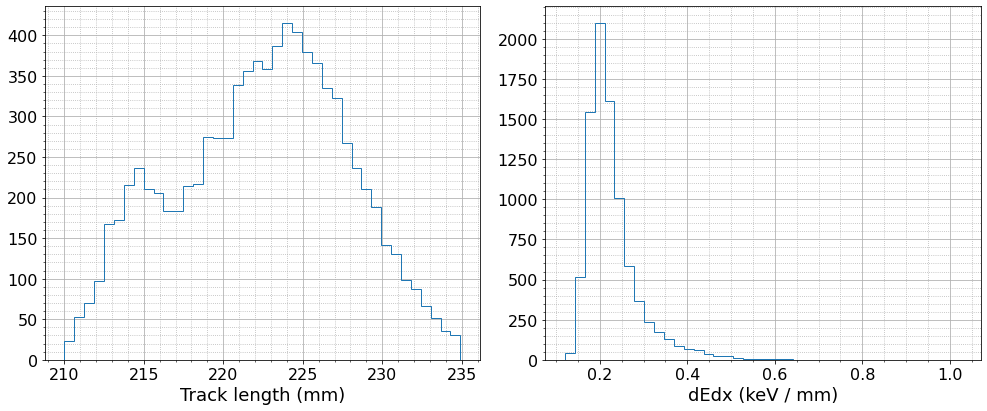

In [139]:
ds = np.load(data['pi_400.0'])
ds = ds[(ds[:, 1] < 235) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8682, 3)


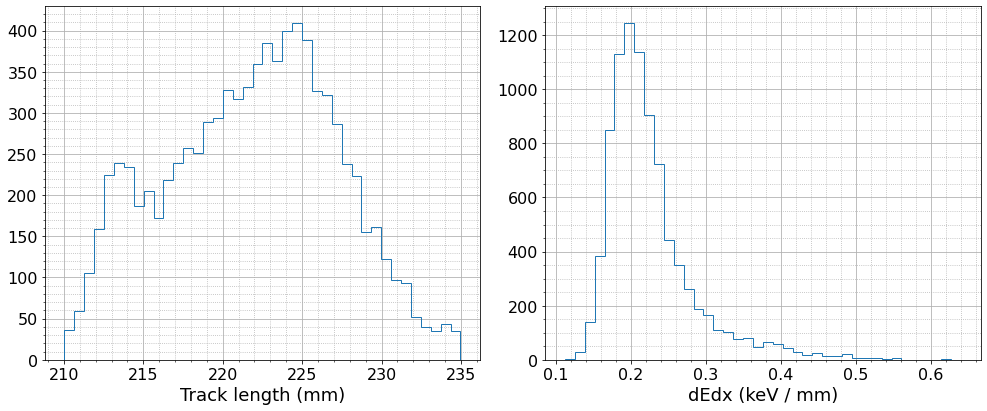

In [142]:
ds = np.load(data['pi_500.0'])
ds = ds[(ds[:, 1] < 235) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8691, 3)


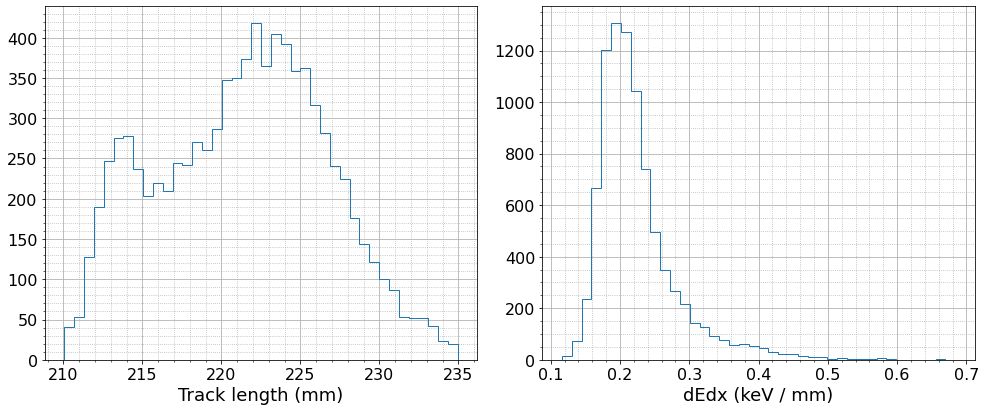

In [143]:
ds = np.load(data['pi_600.0'])
ds = ds[(ds[:, 1] < 235) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8609, 3)


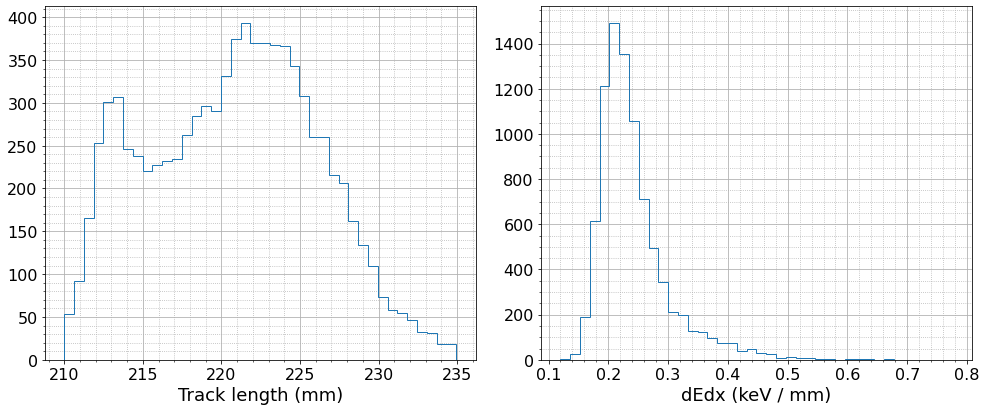

In [145]:
ds = np.load(data['pi_1500.0'])
ds = ds[(ds[:, 1] < 235) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

## Electrons

(8675, 3)


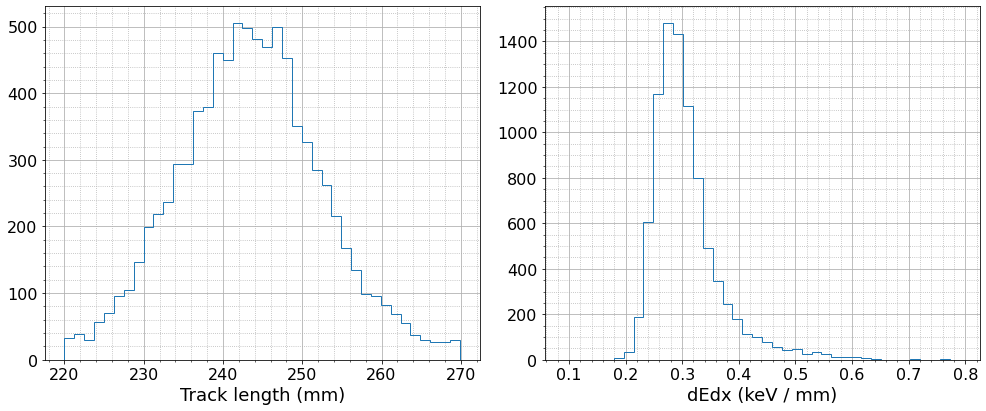

In [162]:
ds = np.load(data['e_100.0'])
ds = ds[(ds[:, 1] < 270) & (ds[:, 1] > 220) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8619, 3)


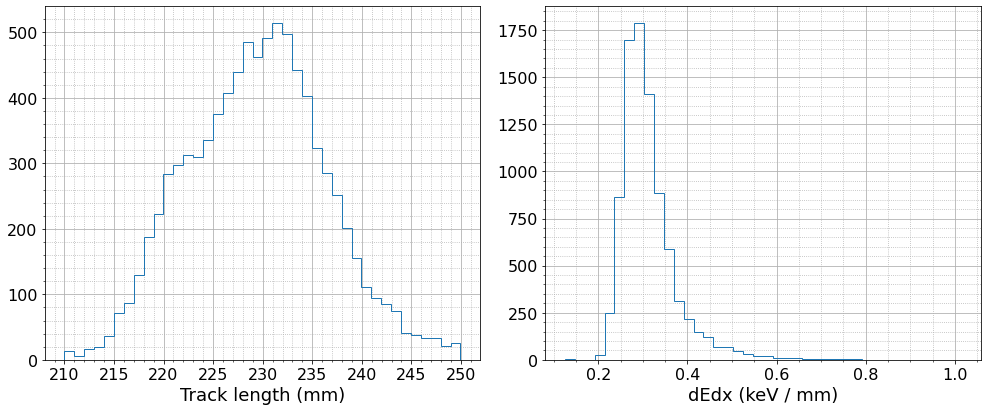

In [163]:
ds = np.load(data['e_150.0'])
ds = ds[(ds[:, 1] < 250) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8709, 3)


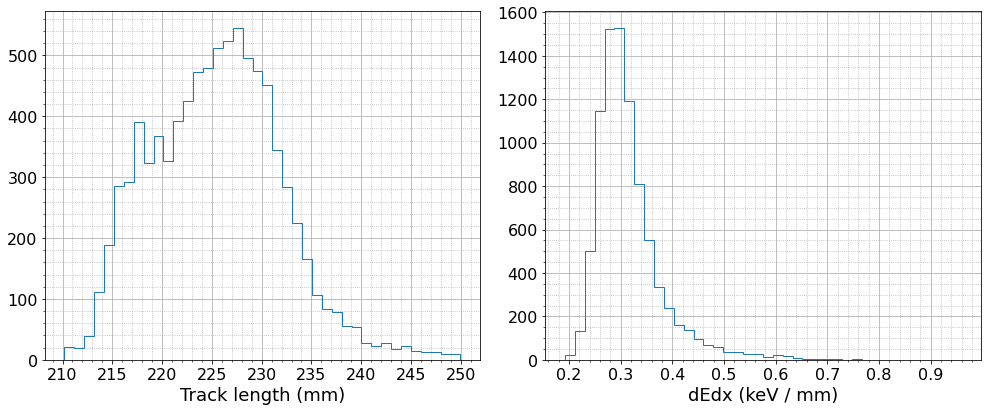

In [164]:
ds = np.load(data['e_200.0'])
ds = ds[(ds[:, 1] < 250) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8655, 3)


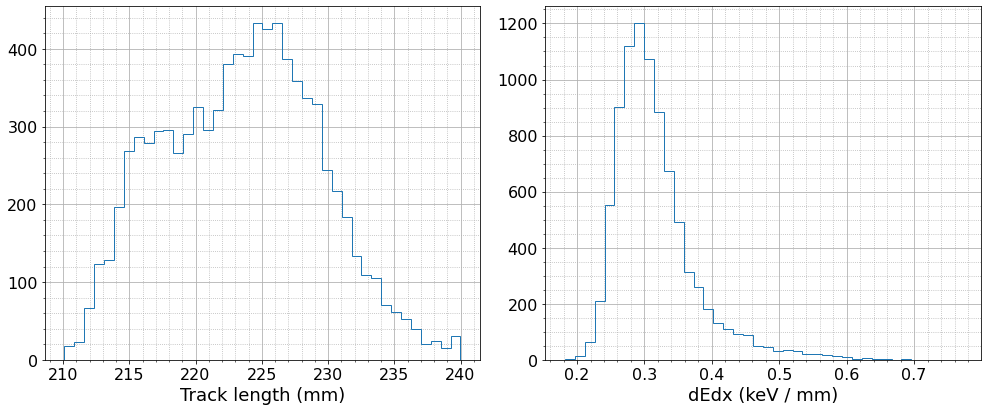

In [165]:
ds = np.load(data['e_250.0'])
ds = ds[(ds[:, 1] < 240) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8618, 3)


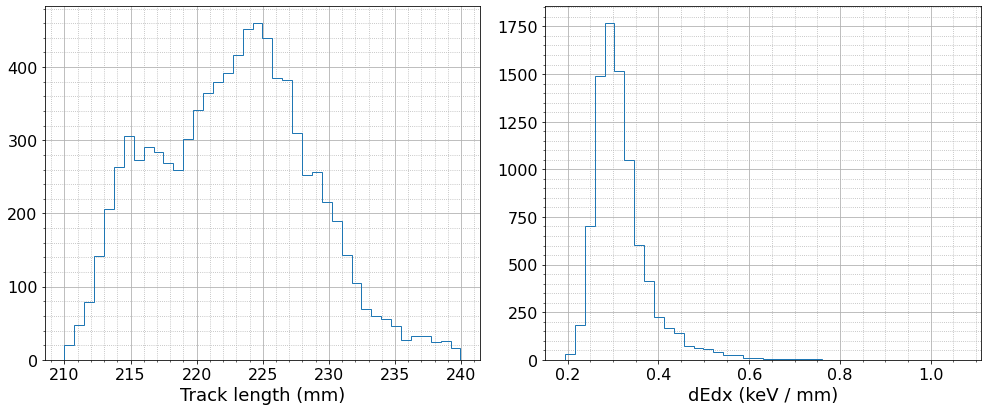

In [166]:
ds = np.load(data['e_300.0'])
ds = ds[(ds[:, 1] < 240) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8528, 3)


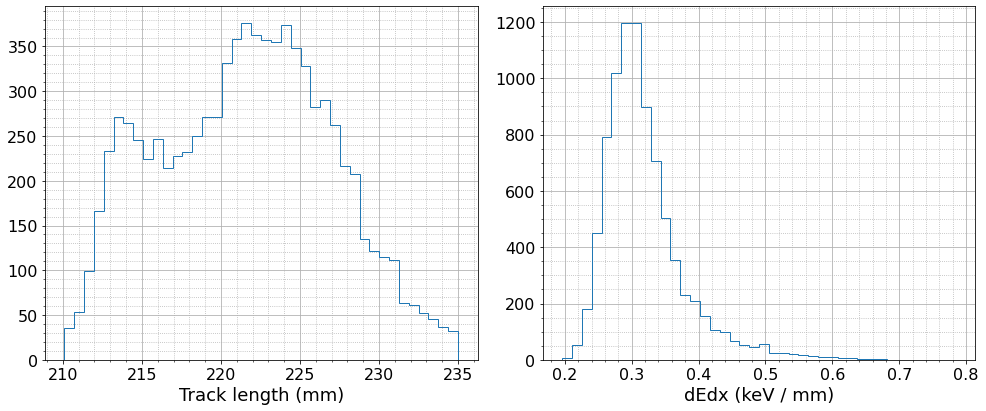

In [172]:
ds = np.load(data['e_400.0'])
ds = ds[(ds[:, 1] < 235) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8587, 3)


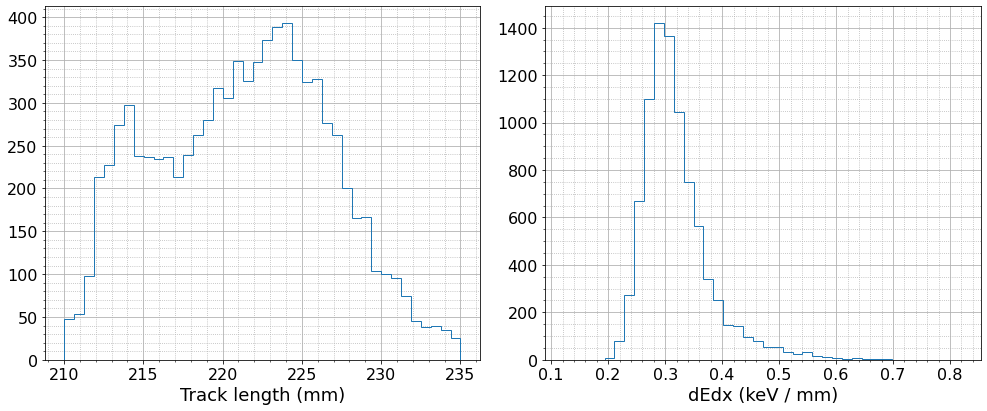

In [173]:
ds = np.load(data['e_500.0'])
ds = ds[(ds[:, 1] < 235) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8600, 3)


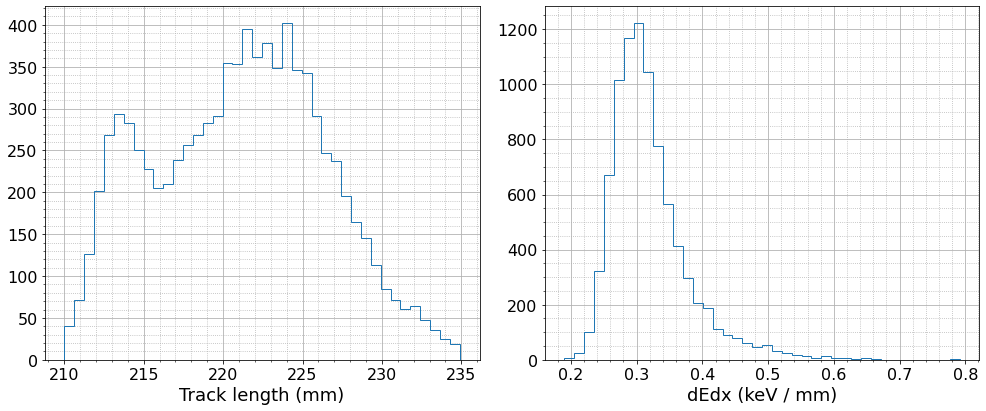

In [174]:
ds = np.load(data['e_600.0'])
ds = ds[(ds[:, 1] < 235) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

(8697, 3)


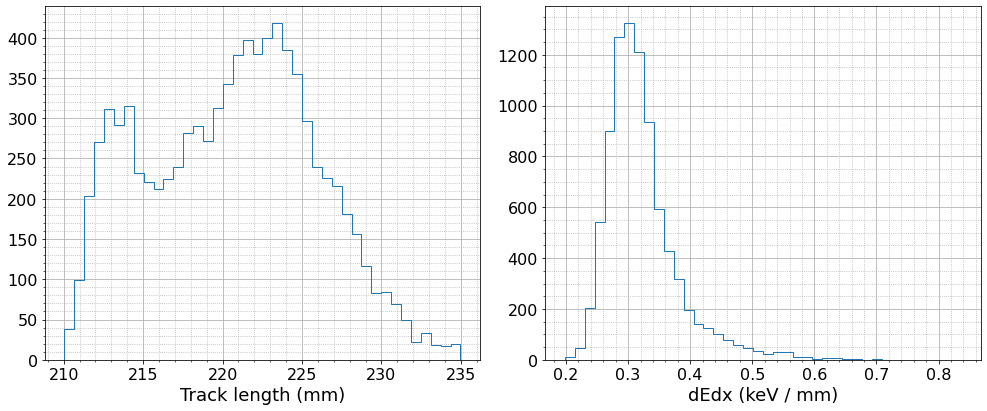

In [175]:
ds = np.load(data['e_1500.0'])
ds = ds[(ds[:, 1] < 235) & (ds[:, 1] > 210) & (ds[:, 2] < 2)]
print(ds.shape)
dedx_plot(ds)

## Kaons

(6293, 3) 0.2498546582046069


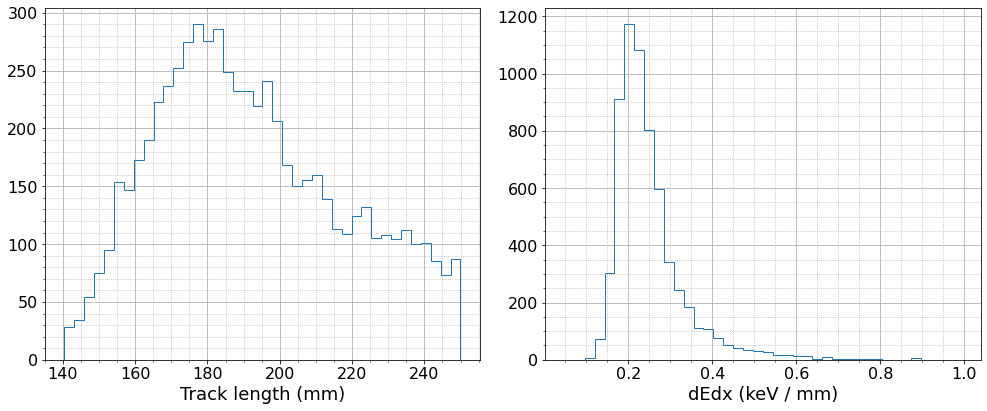

In [194]:
ds = np.load(data['K_100.0'])
ds = ds[(ds[:, 1] < 250) & (ds[:, 1] > 140) & (ds[:, 2] < 1)]
print(ds.shape, ds[:, 2].mean())
dedx_plot(ds)

(2306, 3) 5.207280467104551


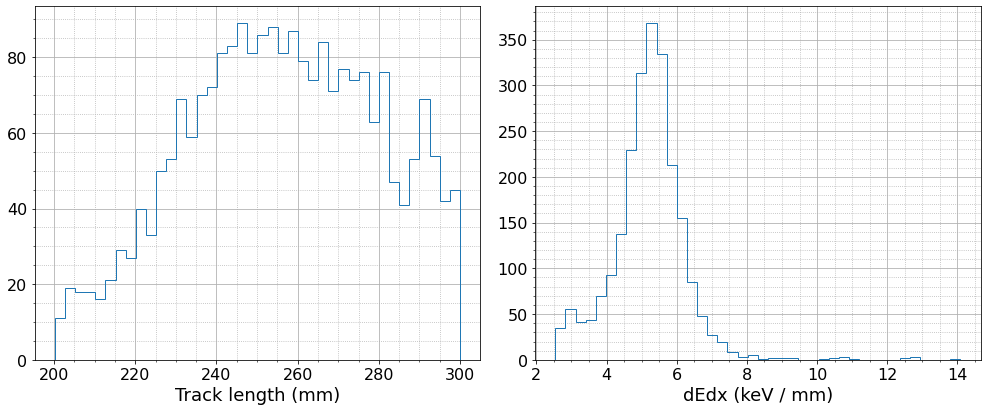

In [201]:
ds = np.load(data['K_150.0'])
ds = ds[
    (ds[:, 1] < 300) & (ds[:, 1] > 200) &
    (ds[:, 2] < 50) & (ds[:, 2] > 2.5)
]
print(ds.shape, ds[:, 2].mean())
dedx_plot(ds)

(6054, 3) 1.3190434076708444


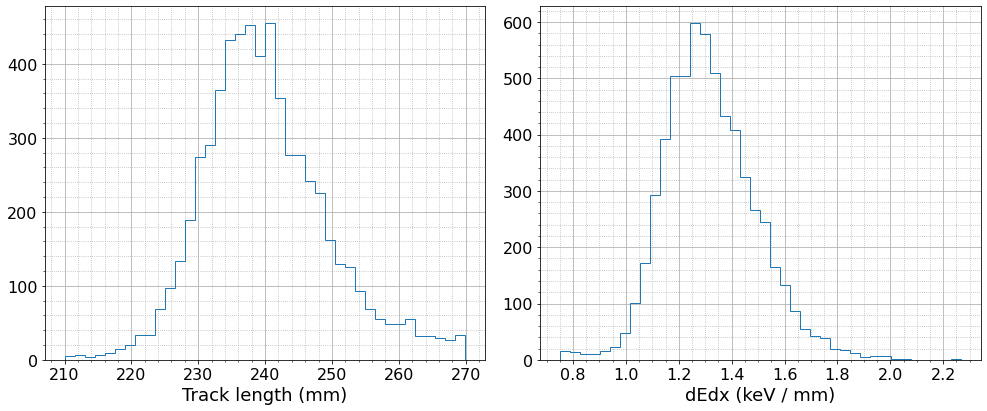

In [210]:
ds = np.load(data['K_200.0'])
ds = ds[
    (ds[:, 1] < 270) & (ds[:, 1] > 210) &
    (ds[:, 2] < 3) & (ds[:, 2] > 0.75)
]
print(ds.shape, ds[:, 2].mean())
dedx_plot(ds)

In [ ]:
ds = np.load(data['K_200.0'])
ds = ds[
    (ds[:, 1] < 270) & (ds[:, 1] > 210) &
    (ds[:, 2] < 3) & (ds[:, 2] > 0.75)
]
print(ds.shape, ds[:, 2].mean())
dedx_plot(ds)